In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("very_clean_data.csv")
df = df.drop(columns=['Unnamed: 0'])
print(df)

     Manufacturer                           Model Name            Category  \
0           Apple                          MacBook Pro           Ultrabook   
1           Apple                          Macbook Air           Ultrabook   
2              HP                               250 G6            Notebook   
3           Apple                          MacBook Pro           Ultrabook   
4           Apple                          MacBook Pro           Ultrabook   
...           ...                                  ...                 ...   
1297       Lenovo                       Yoga 500-14ISK  2 in 1 Convertible   
1298       Lenovo                       Yoga 900-13ISK  2 in 1 Convertible   
1299       Lenovo                   IdeaPad 100S-14IBR            Notebook   
1300           HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook   
1301         Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook   

      Screen Size                           GPU Operating Syste

In [3]:
Ultrabook = df.loc[df['Category'] == 'Ultrabook']
Notebook = df.loc[df['Category'] == 'Notebook']
Netbook = df.loc[df['Category'] == 'Netbook']
Gaming = df.loc[df['Category'] == 'Gaming']
Convertible = df.loc[df['Category'] == '2 in 1 Convertible']
Workstation = df.loc[df['Category'] == 'Workstation']

In [4]:
def getSSE(prediction, fact):
    total = 0
    for i in range(len(prediction)):
        temp = (prediction[i] - fact[i])**2
        total += temp
    return total
def plotResults(df, name, y, x_test, y_test, pred):
    plt.figure(1, figsize=(20,10))
    plt.subplot(231)
    plt.scatter(df['RAM'], y)
    plt.title('RAM vs Price (All ' + name + ')')
    plt.xlabel('RAM size (GB)')
    plt.ylabel('Price (Euros)')
    plt.subplot(232)
    plt.scatter(df['fullRes'], y)
    plt.title('fullRes vs Price (All ' + name + ')')
    plt.xlabel('fullRes (no. pixels)')
    plt.ylabel('Price (Euros)')
    plt.subplot(233)
    plt.scatter(df['Clockspeed'], y)
    plt.title('Clockspeed vs Price (All ' + name + ')')
    plt.xlabel('Clockspeed (GHz)')
    plt.ylabel('Price (Euros)')
    plt.subplot(234)
    plt.scatter([i[0] for i in x_test],y_test, c='red')
    plt.scatter([i[0] for i in x_test],pred)
    plt.title('RAM vs Price (Test ' + name + ')')
    plt.xlabel('RAM size (GB)')
    plt.ylabel('Price (Euros)')
    plt.subplot(235)
    plt.scatter([i[1] for i in x_test],y_test, c='red')
    plt.scatter([i[1] for i in x_test],pred)
    plt.title('fullRes vs Price (Test ' + name + ')')
    plt.xlabel('fullRes (no. pixels)')
    plt.ylabel('Price (Euros)')
    plt.subplot(236)
    plt.scatter([i[2] for i in x_test],y_test, c='red')
    plt.scatter([i[2] for i in x_test],pred)
    plt.title('Clockspeed vs Price (Test ' + name + ')')
    plt.xlabel('Clockspeed (GHz)')
    plt.ylabel('Price (Euros)')
    plt.show()


results = pd.DataFrame(columns=("Category","MSE", "SSE", "R2"))

MSE           SSE           R2           
189351.931105 11171763.935210 0.222946    


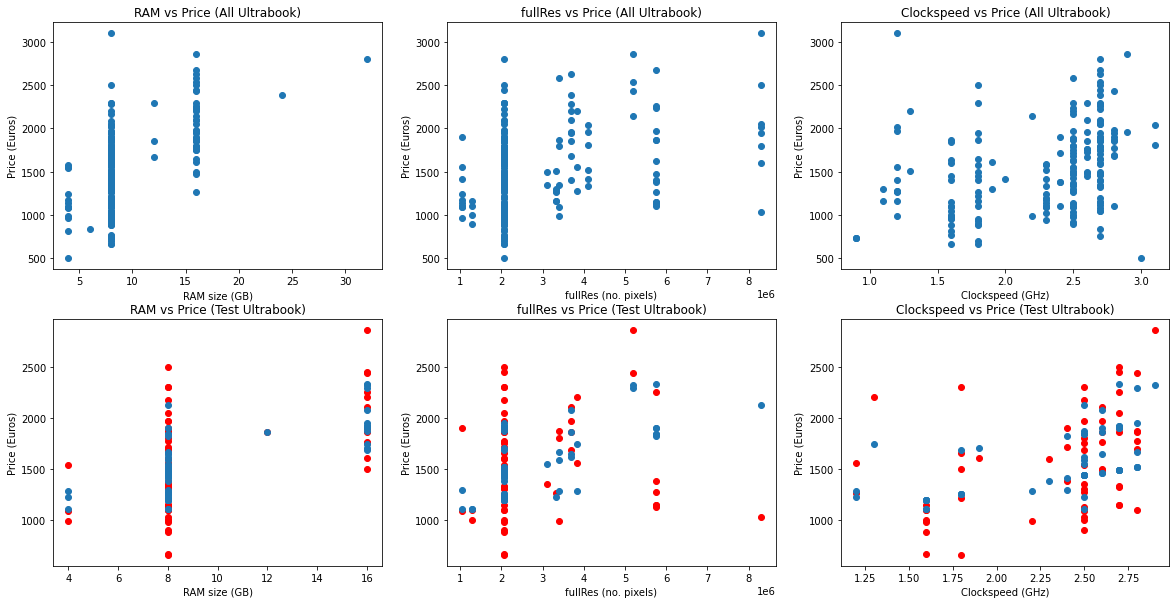

Category            MSE           SSE        R2
0  Ultrabook  189351.931105  1.117176e+07  0.222946

In [5]:
# Ultrabook
ultra_x = Ultrabook[['RAM', 'fullRes', 'Clockspeed']].values
ultra_y = Ultrabook['Price (Euros)'].values
ultra_x_train, ultra_x_test, ultra_y_train, ultra_y_test = train_test_split(ultra_x, ultra_y, test_size = 0.3, random_state = 2201798761)
ultra_regr = linear_model.LinearRegression()
ultra_regr.fit(ultra_x_train, ultra_y_train)

ultra_pred = ultra_regr.predict(ultra_x_test)
ultra_mse = mean_squared_error(ultra_y_test, ultra_pred)
ultra_sse = getSSE(ultra_pred, ultra_y_test)
ultra_r2 = r2_score(ultra_y_test, ultra_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(ultra_mse), '{:12f}'.format(ultra_sse), '{:<12f}'.format(ultra_r2))
plotResults(Ultrabook,"Ultrabook",ultra_y,ultra_x_test,ultra_y_test,ultra_pred)
append = pd.DataFrame({"Category":["Ultrabook"], "MSE":[ultra_mse], "SSE":[ultra_sse], "R2":[ultra_r2]})
results = results.append(append, ignore_index=True)
results

MSE           SSE           R2           
101238.575042 22171247.934149 0.622826    


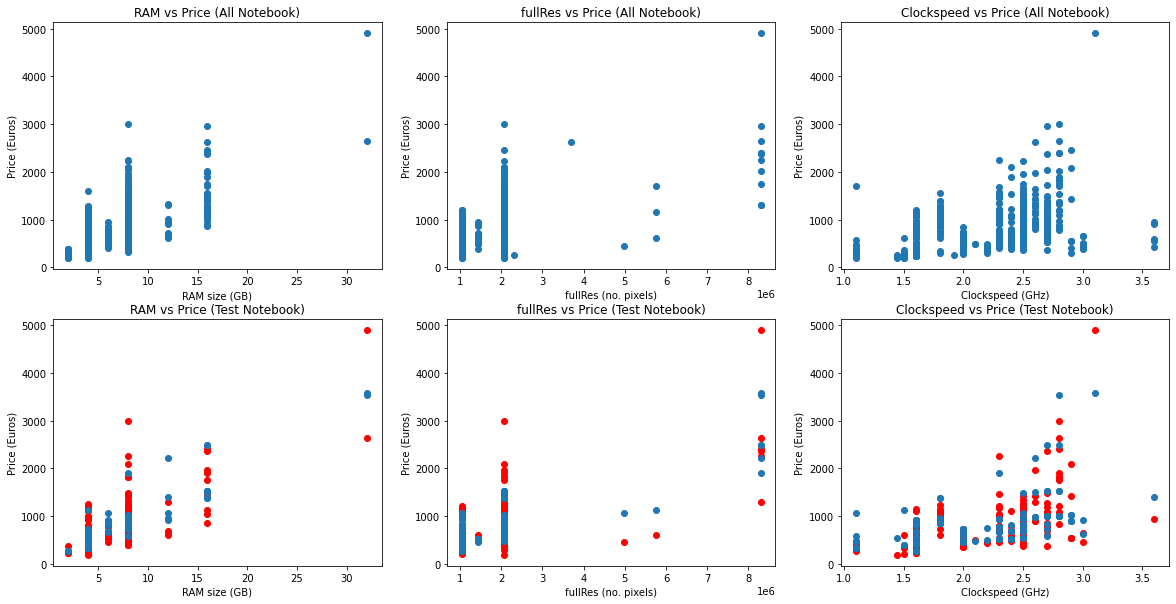

Category            MSE           SSE        R2
0  Ultrabook  189351.931105  1.117176e+07  0.222946
1   Notebook  101238.575042  2.217125e+07  0.622826

In [6]:
# Notebook
note_x = Notebook[['RAM', 'fullRes', 'Clockspeed']].values
note_y = Notebook['Price (Euros)'].values
note_x_train, note_x_test, note_y_train, note_y_test = train_test_split(note_x, note_y, test_size = 0.3, random_state = 2201798761)
note_regr = linear_model.LinearRegression()
note_regr.fit(note_x_train, note_y_train)

note_pred = note_regr.predict(note_x_test)
note_mse = mean_squared_error(note_y_test, note_pred)
note_sse = getSSE(note_pred, note_y_test)
note_r2 = r2_score(note_y_test, note_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(note_mse), '{:12f}'.format(note_sse), '{:<12f}'.format(note_r2))
plotResults(Notebook,"Notebook",note_y,note_x_test,note_y_test,note_pred)
append = pd.DataFrame({"Category":["Notebook"], "MSE":[note_mse], "SSE":[note_sse], "R2":[note_r2]})
results = results.append(append, ignore_index=True)
results

MSE           SSE           R2           
33857.115668 270856.925347 0.837053    


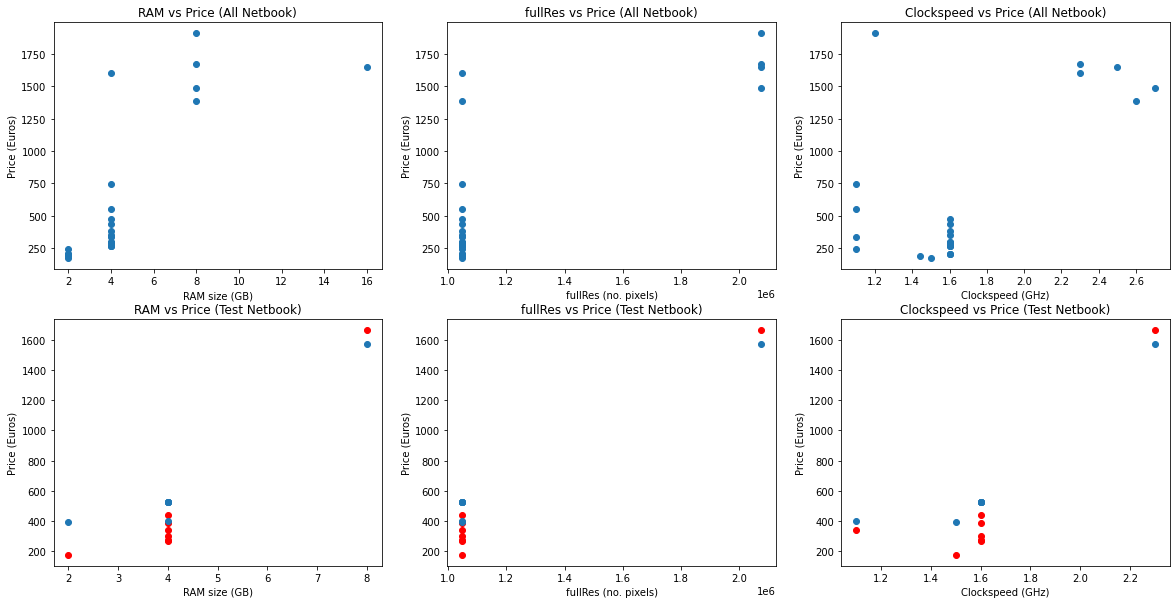

Category            MSE           SSE        R2
0  Ultrabook  189351.931105  1.117176e+07  0.222946
1   Notebook  101238.575042  2.217125e+07  0.622826
2    Netbook   33857.115668  2.708569e+05  0.837053

In [7]:
# Netbook
net_x = Netbook[['RAM', 'fullRes', 'Clockspeed']].values
net_y = Netbook['Price (Euros)'].values
net_x_train, net_x_test, net_y_train, net_y_test = train_test_split(net_x, net_y, test_size = 0.3, random_state = 2201798761)
net_regr = linear_model.LinearRegression()
net_regr.fit(net_x_train, net_y_train)

net_pred = net_regr.predict(net_x_test)
net_mse = mean_squared_error(net_y_test, net_pred)
net_sse = getSSE(net_pred, net_y_test)
net_r2 = r2_score(net_y_test, net_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(net_mse), '{:12f}'.format(net_sse), '{:<12f}'.format(net_r2))
plotResults(Netbook,"Netbook",net_y,net_x_test,net_y_test,net_pred)
append = pd.DataFrame({"Category":["Netbook"], "MSE":[net_mse], "SSE":[net_sse], "R2":[net_r2]})
results = results.append(append, ignore_index=True)
results

MSE           SSE           R2           
234625.422864 14546776.217539 0.687907    


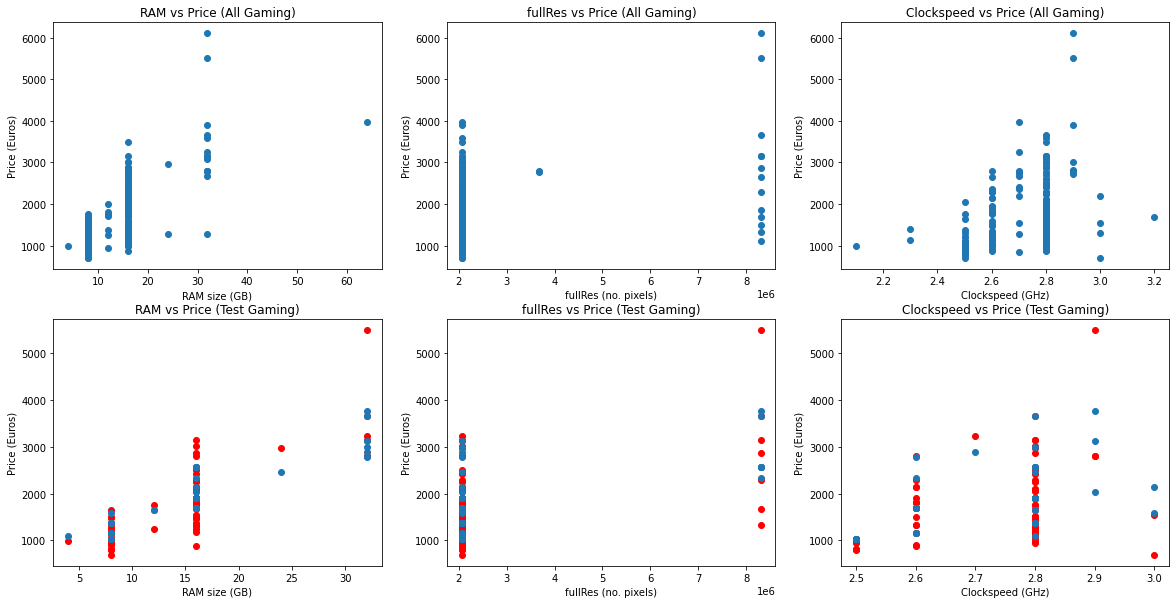

Category            MSE           SSE        R2
0  Ultrabook  189351.931105  1.117176e+07  0.222946
1   Notebook  101238.575042  2.217125e+07  0.622826
2    Netbook   33857.115668  2.708569e+05  0.837053
3     Gaming  234625.422864  1.454678e+07  0.687907

In [8]:
# Gaming
game_x = Gaming[['RAM', 'fullRes', 'Clockspeed']].values
game_y = Gaming['Price (Euros)'].values
game_x_train, game_x_test, game_y_train, game_y_test = train_test_split(game_x, game_y, test_size = 0.3, random_state = 2201798761)
game_regr = linear_model.LinearRegression()
game_regr.fit(game_x_train, game_y_train)

game_pred = game_regr.predict(game_x_test)
game_mse = mean_squared_error(game_y_test, game_pred)
game_sse = getSSE(game_pred, game_y_test)
game_r2 = r2_score(game_y_test, game_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(game_mse), '{:12f}'.format(game_sse), '{:<12f}'.format(game_r2))
plotResults(Gaming,"Gaming",game_y,game_x_test,game_y_test,game_pred)
append = pd.DataFrame({"Category":["Gaming"], "MSE":[game_mse], "SSE":[game_sse], "R2":[game_r2]})
results = results.append(append, ignore_index=True)
results

MSE           SSE           R2           
252810.986501 9101195.514049 0.181806    


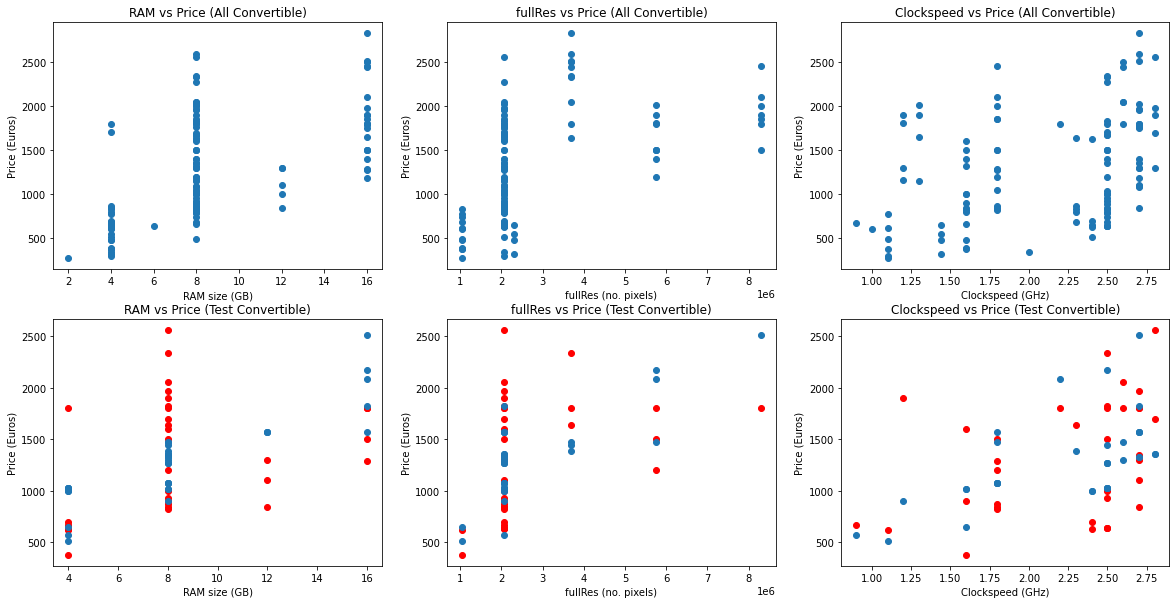

Category            MSE           SSE        R2
0    Ultrabook  189351.931105  1.117176e+07  0.222946
1     Notebook  101238.575042  2.217125e+07  0.622826
2      Netbook   33857.115668  2.708569e+05  0.837053
3       Gaming  234625.422864  1.454678e+07  0.687907
4  Convertible  252810.986501  9.101196e+06  0.181806

In [9]:
# Convertible
conv_x = Convertible[['RAM', 'fullRes', 'Clockspeed']].values
conv_y = Convertible['Price (Euros)'].values
conv_x_train, conv_x_test, conv_y_train, conv_y_test = train_test_split(conv_x, conv_y, test_size = 0.3, random_state = 2201798761)
conv_regr = linear_model.LinearRegression()
conv_regr.fit(conv_x_train, conv_y_train)

conv_pred = conv_regr.predict(conv_x_test)
conv_mse = mean_squared_error(conv_y_test, conv_pred)
conv_sse = getSSE(conv_pred, conv_y_test)
conv_r2 = r2_score(conv_y_test, conv_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(conv_mse), '{:12f}'.format(conv_sse), '{:<12f}'.format(conv_r2))
plotResults(Convertible,"Convertible",conv_y,conv_x_test,conv_y_test,conv_pred)
append = pd.DataFrame({"Category":["Convertible"], "MSE":[conv_mse], "SSE":[conv_sse], "R2":[conv_r2]})
results = results.append(append, ignore_index=True)
results

MSE           SSE           R2           
381991.535647 3437923.820822 -0.694373   


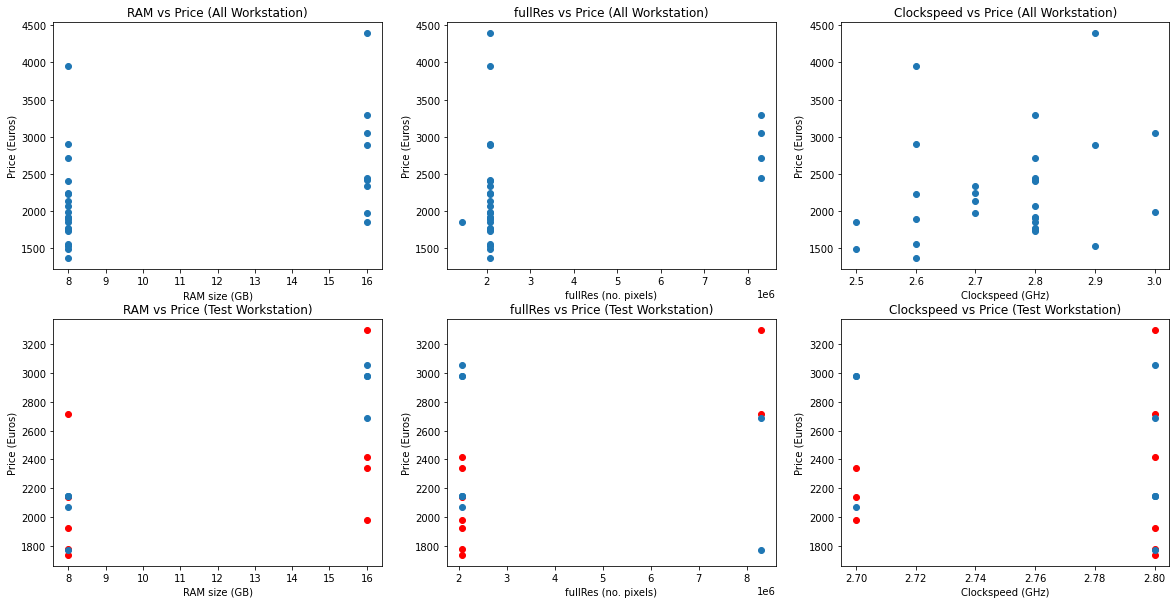

Category            MSE           SSE        R2
0    Ultrabook  189351.931105  1.117176e+07  0.222946
1     Notebook  101238.575042  2.217125e+07  0.622826
2      Netbook   33857.115668  2.708569e+05  0.837053
3       Gaming  234625.422864  1.454678e+07  0.687907
4  Convertible  252810.986501  9.101196e+06  0.181806
5  Workstation  381991.535647  3.437924e+06 -0.694373

In [10]:
# Workstation
work_x = Workstation[['RAM', 'fullRes', 'Clockspeed']].values
work_y = Workstation['Price (Euros)'].values
work_x_train, work_x_test, work_y_train, work_y_test = train_test_split(work_x, work_y, test_size = 0.3, random_state = 2201798761)
work_regr = linear_model.LinearRegression()
work_regr.fit(work_x_train, work_y_train)

work_pred = work_regr.predict(work_x_test)
work_mse = mean_squared_error(work_y_test, work_pred)
work_sse = getSSE(work_pred, work_y_test)
work_r2 = r2_score(work_y_test, work_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(work_mse), '{:12f}'.format(work_sse), '{:<12f}'.format(work_r2))
plotResults(Workstation,"Workstation",work_y,work_x_test,work_y_test,work_pred)
append = pd.DataFrame({"Category":["Workstation"], "MSE":[work_mse], "SSE":[work_sse], "R2":[work_r2]})
results = results.append(append, ignore_index=True)
results

In [11]:
results

Category            MSE           SSE        R2
0    Ultrabook  189351.931105  1.117176e+07  0.222946
1     Notebook  101238.575042  2.217125e+07  0.622826
2      Netbook   33857.115668  2.708569e+05  0.837053
3       Gaming  234625.422864  1.454678e+07  0.687907
4  Convertible  252810.986501  9.101196e+06  0.181806
5  Workstation  381991.535647  3.437924e+06 -0.694373

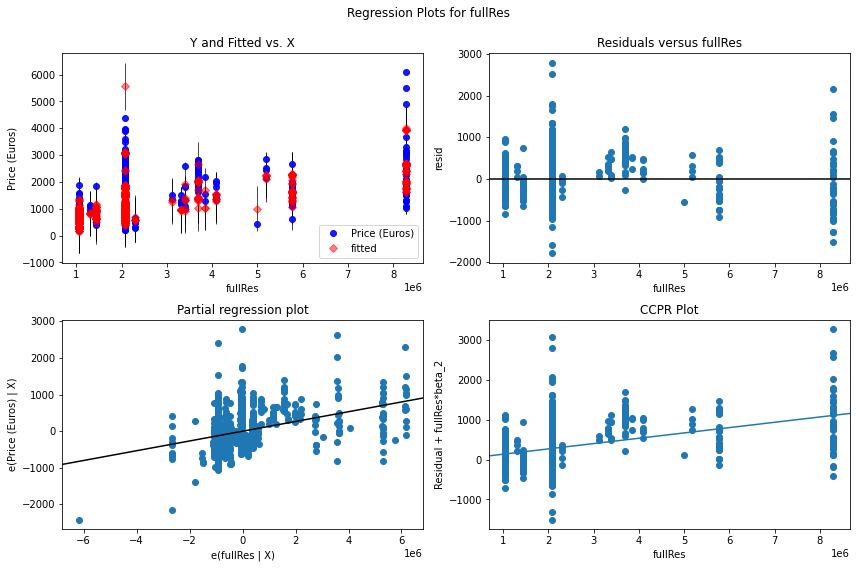

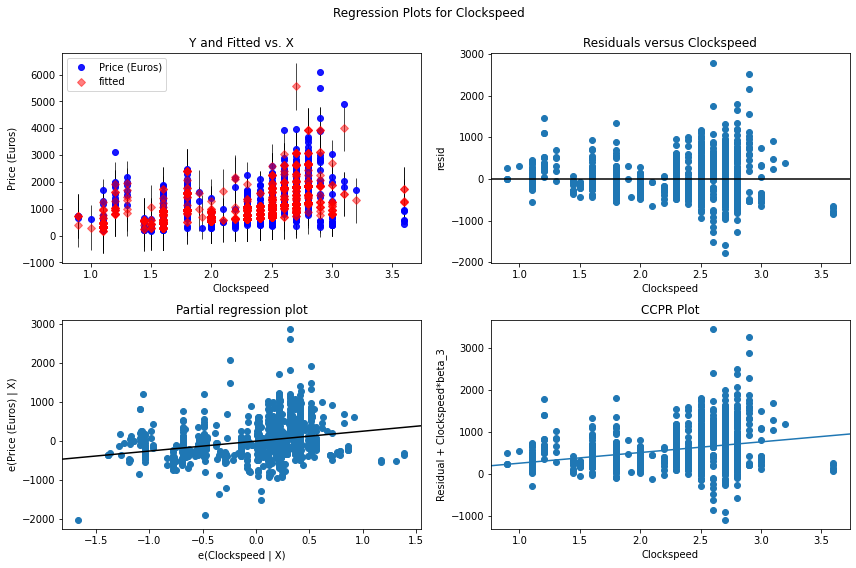